## Diego Melli 4747143-8

In [285]:
%%capture
!pip3 install scikit-learn;
!pip3 install numpy;
!pip3 install scipy;
!pip3 install matplotlib;

In [286]:
#imports
from sklearn.datasets import make_moons
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit

# Ejercicio 1

## Parte 1
Para seleccionar la mejor característica se utiliza el método de ganancia de información que consiste en obtener el atributo que minimiza la reducción de la entropía de la muestra.

$ganancia(S,A) = Entropia(S) - \sum_{v \in Val(A)} \frac{|S_{v}|}{|S|} Entropia(S_{v})  $

Siendo:

*   S = muestra actual
*   A = atributo seleccionado
*   Val(A) todos los valores que toma el atributo A
*   $S_{v}$ = El subconjunto de la muestra para el cual el atributo A toma el valor v. 

A cada atributo le colocamos el nombre de $X_i$ y realizamos los cálculos:

<br>
$E(S) = 1.00$ <br>
$E(6,2) = 0.81$<br>
$E(4,4) = 1.00 $<br>
$E(0,1) = 0.00 $<br>
$E(8,7) = 0.99 $<br>
$E(4,7) = 0.94 $<br>
$E(4,1) = 0.72 $<br>
$E(1,7) = 0.54 $


#### $X_{1}$
$S_{x_{1} =1} = [+6, -2] $ <br>
$S_{x_{1} =0} = [+2, -6] $<br>
$G(S, x_{1}) = 1 - \frac{8}{16} * E(6,2) - \frac{8}{16} * E(2,6)$
<br>
$Ganancia(S, x_{1}) = 0.19 $

#### $X_{2}$
$S_{x_{2} =1} = [+4, -7] $ <br>
$S_{x_{2} =0} = [+4, -1] $
<br>
$Ganancia(S, x_{2}) = 1 - \frac{11}{16} * E(4,7) - \frac{5}{16} *E(4,1)  = 0.1243$                             
#### $X_{3}$
$S_{x_{3} =1} = [+4, -4] $ <br>
$S_{x_{3} =0} = [+4, -4] $

$Ganancia(S, x_{3}) = 1 - \frac{8}{16} * E(4,4) - \frac{8}{16} * E(4,4)  = 0$         

#### $X_{4}$
$S_{x_{4} =1} = [+4, -4] $ <br>
$S_{x_{4} =0} = [+4, -4] $

$Ganancia(S, x_{4}) = 1 - \frac{8}{16} * E(4,4) - \frac{8}{16} * E(4,4)  = 0$    

#### $X_{5}$
$S_{x_{5} =1} = [+0, -1] $ <br>
$S_{x_{5} =0} = [+8, -7] $

$Ganancia(S, x_{5}) = 1 - \frac{1}{16} *E(0,1) - \frac{15}{16} * E(8,7)  = 0.07$

#### $X_{6}$
$S_{x_{6} =1} = [+7, -1] $ <br>
$S_{x_{6} =0} = [+1, -7] $

$Ganancia(S, x_{6}) = 1 - \frac{8}{16} * E(7,1) - \frac{8}{16} * E(1,7)  = 0.46$

El mejor atributo para realizar la partición es $x_{6}$, siendo el que máximiza la ganancia.

## Parte 2,3,4
La hipótesis nula a usar para detener el crecimiento del árbol usando un test hipotesis es:
*   $H_{0} $ distribuciones iguales.

Se estudia si las muestras de la partición siguen la misma distribución, y realizar una selección aleatoria y parar de construir el árbol.

Se realiza el test $X^{2}$ (Pearson).

$ X^{2} = \frac{n}{2n_{D}} X^{2}_{I} $

Siendo:
*   n = cantidad de muestras = $n_{D} + n_{I}$
*   $n_{D}$ = cantidad de muestras que van para la derecha
*   $n_{I}$ = cantidad de muestras que van para la izquierda
*    $X^{2}_{I} = \frac{(n_{I1} - n_{e1})^{2}}{n_{e1}} + \frac{(n_{I2} - n_{e2})^{2}}{n_{e2}} $ con $n_{ei} = \frac{n_{I}}{n}n_{i}$

Entonces:

$X^{2} = \frac{16}{2.8} X^{2}_{I} $ = $X^{2}_{I}$ = $\frac{(1 - 4)^{2}}{4} + \frac{(7 - 4)^{2}}{4} = 4.5 $.

Utilizando un nivel de confianza de 0.01:

-   4.5 < 6.635 Se acepta $H_{0}$ y se detiene el crecimiento del árbol.

Si cambiamos el nivel de confianza a 0.5:

-   4.5 > 3.841 Se rechaza $H_{0}$ y se continua ramificando el árbol.

# Ejercicio 2

## Parte 1
Si pensamos en un arbol perfectamente ajustado al conjunto de entrenamiento (completamente overfitting), tendriamos un nodo de condición de igualdad para cada posible valor de cada caracteristica. Por esto cada hoja tiene solo una instancia de ejemplo, por lo que tendriamos 1 millon de hojas y por ende la profundidad es tambien 1 millon.

## Parte 2
La impureza de Gini se puede interpretar como la tasa de error esperado en el nodo N si la clase a asignar se sortea en forma aleatoria usando la distribución de clases presente en el nodo N
En cada paso se selecciona la característica que genera la mayor ganancia de información.
Cada nodo generado disminuye su impureza debido a que los atributos seleccionados van a provocar una ganancia de información menor (puesto que en los pasos anteriores se seleccionaron para particionar el árbol aquellos que maximizaban la ganancia).

## Parte 3
Decrementar la profundidad del arbol llevará a que este sea mas general, ya que tendrá menos condiciones. El decremento puede realizarse mediante poda, o si estamos en fase de construcción se podría parar al momento de llegar a la profundidad indicada.

## Parte 5

In [287]:
X, y = make_moons(n_samples=10000, noise=0.4)

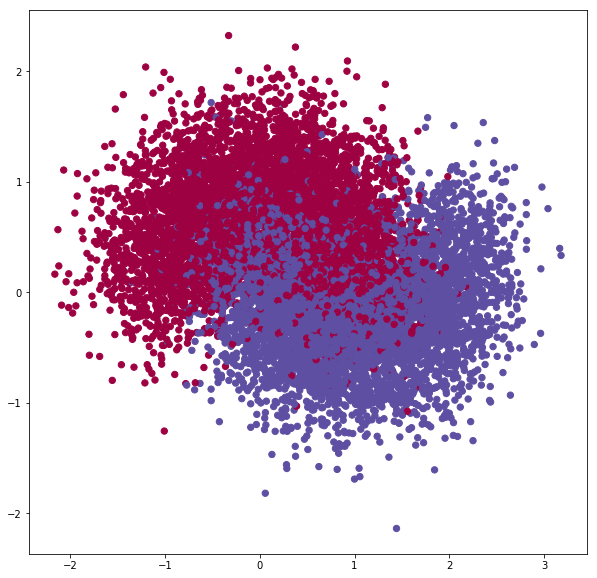

In [288]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

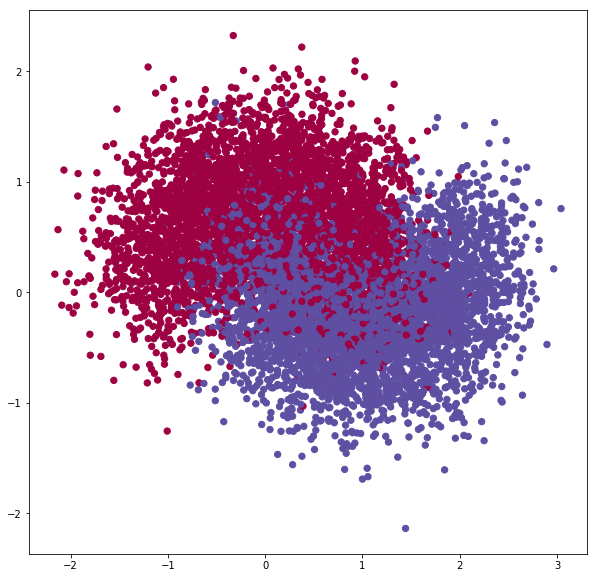

In [290]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train[:,0], X_train[:,1], s=40, c=y_train, cmap=plt.cm.Spectral)
plt.show()

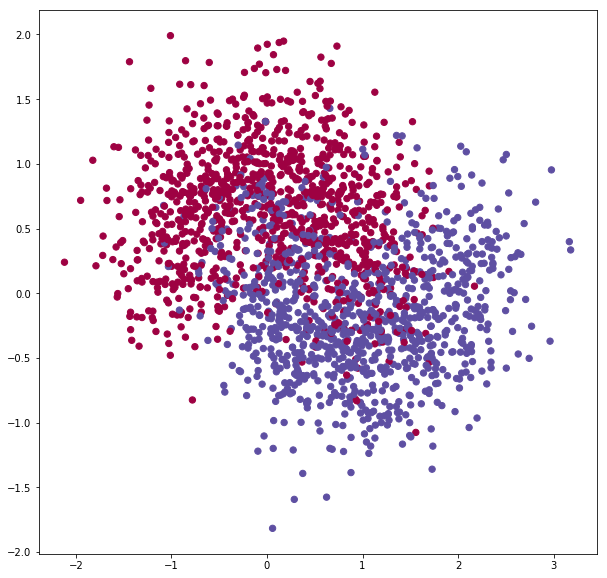

In [291]:
plt.figure(figsize=(10, 10))
plt.scatter(X_test[:,0], X_test[:,1], s=40, c=y_test, cmap=plt.cm.Spectral)
plt.show()

In [292]:
parameters = {'criterion':['gini', 'entropy'],
              'splitter':['best', 'random'],
              'min_samples_split':[2,3,5,8],
              'min_samples_leaf':[1,2,3,5],
              'max_leaf_nodes': [10,15,20,25]
             }

tree = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(tree, parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 3, 5, 8], 'min_samples_leaf': [1, 2, 3, 5], 'max_leaf_nodes': [10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [293]:
def report(y_true, y_pred, conf_matrix=False):
    print(classification_report(y_true, y_pred))
    if conf_matrix:
        print(confusion_matrix(y_test, y_pred))

In [294]:
print("Best parameters:")
print()
print(clf.best_params_)
print()
print("Detailed classification report:")
print()

y_true, y_pred = y_test, clf.predict(X_test)
print(report(y_true, y_pred, True))
print()
print("Grid scores:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters:

{'criterion': 'entropy', 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}

Detailed classification report:

             precision    recall  f1-score   support

          0       0.85      0.83      0.84      1012
          1       0.83      0.85      0.84       988

avg / total       0.84      0.84      0.84      2000

[[843 169]
 [144 844]]
None

Grid scores:

0.858 (+/-0.022) for {'criterion': 'gini', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.744 (+/-0.070) for {'criterion': 'gini', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.858 (+/-0.022) for {'criterion': 'gini', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.744 (+/-0.070) for {'criterion': 'gini', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
0.858 (+/-0.022) for {'criterion': 'gini', '

# Ejercicio 3

## Parte 1 y 2

Best parameters:
{'criterion': 'entropy', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

In [295]:
shuff = ShuffleSplit(n_splits=1000,train_size=100, test_size=0, random_state=0)
tree_list = []
for train_index, _ in shuff.split(X, y):
    
    tree_best = DecisionTreeClassifier(criterion= 'entropy', max_leaf_nodes= 10, min_samples_leaf= 1, min_samples_split= 2, splitter= 'best', random_state=0)
    tree_best = tree_best.fit(X[train_index], y[train_index])

    tree_list.append(tree_best)

In [296]:
for tr in tree_list:
    y_true, y_pred = y_test, tr.predict(X_test)
    print(report(y_true, y_pred, True))

             precision    recall  f1-score   support

          0       0.88      0.75      0.81      1012
          1       0.78      0.90      0.84       988

avg / total       0.83      0.82      0.82      2000

[[764 248]
 [102 886]]
None
             precision    recall  f1-score   support

          0       0.84      0.84      0.84      1012
          1       0.84      0.83      0.84       988

avg / total       0.84      0.84      0.84      2000

[[855 157]
 [165 823]]
None
             precision    recall  f1-score   support

          0       0.72      0.94      0.81      1012
          1       0.91      0.62      0.74       988

avg / total       0.81      0.78      0.78      2000

[[951  61]
 [372 616]]
None
             precision    recall  f1-score   support

          0       0.83      0.81      0.82      1012
          1       0.81      0.83      0.82       988

avg / total       0.82      0.82      0.82      2000

[[815 197]
 [168 820]]
None
             precision    re

[[867 145]
 [264 724]]
None
             precision    recall  f1-score   support

          0       0.71      0.84      0.77      1012
          1       0.80      0.64      0.71       988

avg / total       0.75      0.74      0.74      2000

[[854 158]
 [352 636]]
None
             precision    recall  f1-score   support

          0       0.83      0.84      0.84      1012
          1       0.84      0.83      0.83       988

avg / total       0.84      0.84      0.84      2000

[[854 158]
 [170 818]]
None
             precision    recall  f1-score   support

          0       0.78      0.90      0.84      1012
          1       0.88      0.73      0.80       988

avg / total       0.83      0.82      0.82      2000

[[915  97]
 [264 724]]
None
             precision    recall  f1-score   support

          0       0.79      0.79      0.79      1012
          1       0.79      0.79      0.79       988

avg / total       0.79      0.79      0.79      2000

[[802 210]
 [207 781]]
None


[[785 227]
 [224 764]]
None
             precision    recall  f1-score   support

          0       0.79      0.78      0.78      1012
          1       0.78      0.79      0.78       988

avg / total       0.78      0.78      0.78      2000

[[788 224]
 [211 777]]
None
             precision    recall  f1-score   support

          0       0.79      0.70      0.74      1012
          1       0.73      0.80      0.76       988

avg / total       0.76      0.75      0.75      2000

[[711 301]
 [193 795]]
None
             precision    recall  f1-score   support

          0       0.86      0.66      0.75      1012
          1       0.72      0.89      0.80       988

avg / total       0.79      0.77      0.77      2000

[[667 345]
 [106 882]]
None
             precision    recall  f1-score   support

          0       0.84      0.80      0.82      1012
          1       0.80      0.85      0.82       988

avg / total       0.82      0.82      0.82      2000

[[805 207]
 [149 839]]
None


[[817 195]
 [192 796]]
None
             precision    recall  f1-score   support

          0       0.81      0.90      0.85      1012
          1       0.88      0.78      0.83       988

avg / total       0.84      0.84      0.84      2000

[[906 106]
 [213 775]]
None
             precision    recall  f1-score   support

          0       0.75      0.86      0.80      1012
          1       0.83      0.70      0.76       988

avg / total       0.79      0.78      0.78      2000

[[875 137]
 [298 690]]
None
             precision    recall  f1-score   support

          0       0.84      0.78      0.81      1012
          1       0.79      0.85      0.82       988

avg / total       0.82      0.82      0.82      2000

[[794 218]
 [149 839]]
None
             precision    recall  f1-score   support

          0       0.81      0.81      0.81      1012
          1       0.81      0.81      0.81       988

avg / total       0.81      0.81      0.81      2000

[[822 190]
 [192 796]]
None


             precision    recall  f1-score   support

          0       0.86      0.65      0.74      1012
          1       0.72      0.89      0.80       988

avg / total       0.79      0.77      0.77      2000

[[661 351]
 [104 884]]
None
             precision    recall  f1-score   support

          0       0.82      0.86      0.84      1012
          1       0.85      0.81      0.83       988

avg / total       0.84      0.84      0.84      2000

[[872 140]
 [187 801]]
None
             precision    recall  f1-score   support

          0       0.83      0.76      0.79      1012
          1       0.77      0.84      0.80       988

avg / total       0.80      0.80      0.80      2000

[[768 244]
 [162 826]]
None
             precision    recall  f1-score   support

          0       0.81      0.81      0.81      1012
          1       0.81      0.81      0.81       988

avg / total       0.81      0.81      0.81      2000

[[821 191]
 [187 801]]
None
             precision    re

             precision    recall  f1-score   support

          0       0.75      0.85      0.80      1012
          1       0.82      0.72      0.77       988

avg / total       0.79      0.78      0.78      2000

[[861 151]
 [280 708]]
None
             precision    recall  f1-score   support

          0       0.74      0.77      0.76      1012
          1       0.76      0.73      0.74       988

avg / total       0.75      0.75      0.75      2000

[[782 230]
 [269 719]]
None
             precision    recall  f1-score   support

          0       0.82      0.81      0.81      1012
          1       0.81      0.82      0.81       988

avg / total       0.81      0.81      0.81      2000

[[817 195]
 [179 809]]
None
             precision    recall  f1-score   support

          0       0.84      0.76      0.80      1012
          1       0.78      0.85      0.81       988

avg / total       0.81      0.81      0.81      2000

[[772 240]
 [145 843]]
None
             precision    re

             precision    recall  f1-score   support

          0       0.81      0.89      0.85      1012
          1       0.87      0.79      0.83       988

avg / total       0.84      0.84      0.84      2000

[[896 116]
 [209 779]]
None
             precision    recall  f1-score   support

          0       0.81      0.84      0.82      1012
          1       0.83      0.80      0.81       988

avg / total       0.82      0.82      0.82      2000

[[848 164]
 [199 789]]
None
             precision    recall  f1-score   support

          0       0.83      0.73      0.78      1012
          1       0.76      0.84      0.80       988

avg / total       0.79      0.79      0.79      2000

[[742 270]
 [155 833]]
None
             precision    recall  f1-score   support

          0       0.80      0.81      0.81      1012
          1       0.80      0.80      0.80       988

avg / total       0.80      0.80      0.80      2000

[[821 191]
 [202 786]]
None
             precision    re

             precision    recall  f1-score   support

          0       0.75      0.87      0.80      1012
          1       0.84      0.70      0.76       988

avg / total       0.79      0.79      0.78      2000

[[878 134]
 [293 695]]
None
             precision    recall  f1-score   support

          0       0.80      0.62      0.70      1012
          1       0.68      0.84      0.75       988

avg / total       0.74      0.73      0.72      2000

[[629 383]
 [161 827]]
None
             precision    recall  f1-score   support

          0       0.78      0.83      0.80      1012
          1       0.81      0.76      0.79       988

avg / total       0.80      0.79      0.79      2000

[[836 176]
 [235 753]]
None
             precision    recall  f1-score   support

          0       0.82      0.81      0.81      1012
          1       0.81      0.82      0.81       988

avg / total       0.81      0.81      0.81      2000

[[818 194]
 [180 808]]
None
             precision    re

             precision    recall  f1-score   support

          0       0.81      0.83      0.82      1012
          1       0.82      0.80      0.81       988

avg / total       0.82      0.82      0.82      2000

[[840 172]
 [196 792]]
None
             precision    recall  f1-score   support

          0       0.72      0.86      0.78      1012
          1       0.82      0.65      0.73       988

avg / total       0.77      0.76      0.76      2000

[[875 137]
 [346 642]]
None
             precision    recall  f1-score   support

          0       0.74      0.88      0.80      1012
          1       0.85      0.69      0.76       988

avg / total       0.79      0.78      0.78      2000

[[889 123]
 [311 677]]
None
             precision    recall  f1-score   support

          0       0.88      0.65      0.75      1012
          1       0.72      0.91      0.80       988

avg / total       0.80      0.78      0.77      2000

[[655 357]
 [ 86 902]]
None
             precision    re

[[856 156]
 [288 700]]
None
             precision    recall  f1-score   support

          0       0.77      0.87      0.82      1012
          1       0.85      0.74      0.79       988

avg / total       0.81      0.81      0.81      2000

[[885 127]
 [258 730]]
None
             precision    recall  f1-score   support

          0       0.76      0.88      0.82      1012
          1       0.86      0.72      0.78       988

avg / total       0.81      0.80      0.80      2000

[[895 117]
 [281 707]]
None
             precision    recall  f1-score   support

          0       0.79      0.78      0.78      1012
          1       0.78      0.78      0.78       988

avg / total       0.78      0.78      0.78      2000

[[788 224]
 [215 773]]
None
             precision    recall  f1-score   support

          0       0.71      0.96      0.82      1012
          1       0.94      0.61      0.74       988

avg / total       0.82      0.79      0.78      2000

[[973  39]
 [390 598]]
None


             precision    recall  f1-score   support

          0       0.77      0.86      0.82      1012
          1       0.84      0.74      0.79       988

avg / total       0.81      0.80      0.80      2000

[[874 138]
 [258 730]]
None
             precision    recall  f1-score   support

          0       0.81      0.86      0.83      1012
          1       0.85      0.79      0.82       988

avg / total       0.83      0.82      0.82      2000

[[870 142]
 [209 779]]
None
             precision    recall  f1-score   support

          0       0.73      0.95      0.82      1012
          1       0.92      0.64      0.75       988

avg / total       0.82      0.79      0.79      2000

[[958  54]
 [360 628]]
None
             precision    recall  f1-score   support

          0       0.83      0.76      0.79      1012
          1       0.77      0.84      0.80       988

avg / total       0.80      0.80      0.80      2000

[[767 245]
 [160 828]]
None
             precision    re

[[756 256]
 [104 884]]
None
             precision    recall  f1-score   support

          0       0.79      0.81      0.80      1012
          1       0.80      0.78      0.79       988

avg / total       0.80      0.80      0.80      2000

[[819 193]
 [216 772]]
None
             precision    recall  f1-score   support

          0       0.77      0.90      0.83      1012
          1       0.88      0.72      0.79       988

avg / total       0.82      0.81      0.81      2000

[[912 100]
 [272 716]]
None
             precision    recall  f1-score   support

          0       0.78      0.84      0.81      1012
          1       0.82      0.76      0.79       988

avg / total       0.80      0.80      0.80      2000

[[851 161]
 [234 754]]
None
             precision    recall  f1-score   support

          0       0.81      0.88      0.85      1012
          1       0.87      0.79      0.83       988

avg / total       0.84      0.84      0.84      2000

[[892 120]
 [206 782]]
None


             precision    recall  f1-score   support

          0       0.73      0.89      0.80      1012
          1       0.85      0.66      0.74       988

avg / total       0.79      0.78      0.77      2000

[[897 115]
 [334 654]]
None
             precision    recall  f1-score   support

          0       0.80      0.86      0.83      1012
          1       0.85      0.79      0.82       988

avg / total       0.83      0.82      0.82      2000

[[873 139]
 [212 776]]
None
             precision    recall  f1-score   support

          0       0.80      0.83      0.81      1012
          1       0.82      0.78      0.80       988

avg / total       0.81      0.81      0.81      2000

[[839 173]
 [213 775]]
None
             precision    recall  f1-score   support

          0       0.80      0.88      0.84      1012
          1       0.86      0.78      0.82       988

avg / total       0.83      0.83      0.83      2000

[[888 124]
 [219 769]]
None
             precision    re

             precision    recall  f1-score   support

          0       0.76      0.91      0.83      1012
          1       0.88      0.71      0.78       988

avg / total       0.82      0.81      0.80      2000

[[916  96]
 [290 698]]
None
             precision    recall  f1-score   support

          0       0.82      0.83      0.82      1012
          1       0.82      0.82      0.82       988

avg / total       0.82      0.82      0.82      2000

[[838 174]
 [182 806]]
None
             precision    recall  f1-score   support

          0       0.80      0.84      0.82      1012
          1       0.82      0.78      0.80       988

avg / total       0.81      0.81      0.81      2000

[[846 166]
 [218 770]]
None
             precision    recall  f1-score   support

          0       0.84      0.81      0.83      1012
          1       0.82      0.85      0.83       988

avg / total       0.83      0.83      0.83      2000

[[823 189]
 [152 836]]
None
             precision    re

[[857 155]
 [167 821]]
None
             precision    recall  f1-score   support

          0       0.83      0.73      0.78      1012
          1       0.76      0.85      0.80       988

avg / total       0.80      0.79      0.79      2000

[[740 272]
 [147 841]]
None
             precision    recall  f1-score   support

          0       0.80      0.88      0.84      1012
          1       0.86      0.77      0.82       988

avg / total       0.83      0.83      0.83      2000

[[892 120]
 [223 765]]
None
             precision    recall  f1-score   support

          0       0.77      0.87      0.82      1012
          1       0.85      0.74      0.79       988

avg / total       0.81      0.81      0.81      2000

[[884 128]
 [259 729]]
None
             precision    recall  f1-score   support

          0       0.76      0.86      0.80      1012
          1       0.83      0.72      0.77       988

avg / total       0.79      0.79      0.79      2000

[[866 146]
 [278 710]]
None


[[824 188]
 [218 770]]
None
             precision    recall  f1-score   support

          0       0.79      0.71      0.75      1012
          1       0.73      0.80      0.76       988

avg / total       0.76      0.76      0.76      2000

[[721 291]
 [197 791]]
None
             precision    recall  f1-score   support

          0       0.76      0.82      0.79      1012
          1       0.80      0.74      0.77       988

avg / total       0.78      0.78      0.78      2000

[[834 178]
 [258 730]]
None
             precision    recall  f1-score   support

          0       0.85      0.69      0.76      1012
          1       0.73      0.88      0.80       988

avg / total       0.79      0.78      0.78      2000

[[694 318]
 [118 870]]
None
             precision    recall  f1-score   support

          0       0.82      0.77      0.80      1012
          1       0.78      0.83      0.80       988

avg / total       0.80      0.80      0.80      2000

[[784 228]
 [172 816]]
None


             precision    recall  f1-score   support

          0       0.83      0.83      0.83      1012
          1       0.82      0.83      0.83       988

avg / total       0.83      0.83      0.83      2000

[[837 175]
 [170 818]]
None
             precision    recall  f1-score   support

          0       0.77      0.92      0.84      1012
          1       0.90      0.72      0.80       988

avg / total       0.83      0.82      0.82      2000

[[931  81]
 [277 711]]
None
             precision    recall  f1-score   support

          0       0.75      0.91      0.82      1012
          1       0.88      0.68      0.77       988

avg / total       0.81      0.80      0.80      2000

[[923  89]
 [313 675]]
None
             precision    recall  f1-score   support

          0       0.80      0.78      0.79      1012
          1       0.78      0.80      0.79       988

avg / total       0.79      0.79      0.79      2000

[[791 221]
 [199 789]]
None
             precision    re

             precision    recall  f1-score   support

          0       0.76      0.80      0.78      1012
          1       0.78      0.75      0.76       988

avg / total       0.77      0.77      0.77      2000

[[805 207]
 [251 737]]
None
             precision    recall  f1-score   support

          0       0.77      0.64      0.70      1012
          1       0.68      0.80      0.74       988

avg / total       0.73      0.72      0.72      2000

[[648 364]
 [198 790]]
None
             precision    recall  f1-score   support

          0       0.85      0.80      0.83      1012
          1       0.81      0.85      0.83       988

avg / total       0.83      0.83      0.83      2000

[[813 199]
 [144 844]]
None
             precision    recall  f1-score   support

          0       0.83      0.75      0.78      1012
          1       0.76      0.84      0.80       988

avg / total       0.79      0.79      0.79      2000

[[756 256]
 [160 828]]
None
             precision    re


[[809 203]
 [186 802]]
None
             precision    recall  f1-score   support

          0       0.82      0.83      0.82      1012
          1       0.82      0.81      0.82       988

avg / total       0.82      0.82      0.82      2000

[[840 172]
 [189 799]]
None
             precision    recall  f1-score   support

          0       0.84      0.80      0.82      1012
          1       0.80      0.85      0.83       988

avg / total       0.82      0.82      0.82      2000

[[806 206]
 [149 839]]
None
             precision    recall  f1-score   support

          0       0.85      0.72      0.78      1012
          1       0.75      0.87      0.81       988

avg / total       0.80      0.79      0.79      2000

[[731 281]
 [130 858]]
None
             precision    recall  f1-score   support

          0       0.76      0.91      0.82      1012
          1       0.88      0.70      0.78       988

avg / total       0.82      0.80      0.80      2000

[[917  95]
 [297 691]]
None

             precision    recall  f1-score   support

          0       0.80      0.70      0.75      1012
          1       0.73      0.82      0.77       988

avg / total       0.77      0.76      0.76      2000

[[711 301]
 [174 814]]
None
             precision    recall  f1-score   support

          0       0.74      0.88      0.80      1012
          1       0.85      0.69      0.76       988

avg / total       0.79      0.78      0.78      2000

[[888 124]
 [308 680]]
None
             precision    recall  f1-score   support

          0       0.84      0.79      0.82      1012
          1       0.80      0.85      0.82       988

avg / total       0.82      0.82      0.82      2000

[[799 213]
 [147 841]]
None
             precision    recall  f1-score   support

          0       0.80      0.81      0.81      1012
          1       0.81      0.80      0.80       988

avg / total       0.81      0.81      0.81      2000

[[823 189]
 [200 788]]
None
             precision    re

[[744 268]
 [118 870]]
None
             precision    recall  f1-score   support

          0       0.76      0.80      0.78      1012
          1       0.78      0.75      0.77       988

avg / total       0.77      0.77      0.77      2000

[[807 205]
 [249 739]]
None
             precision    recall  f1-score   support

          0       0.78      0.79      0.78      1012
          1       0.78      0.77      0.77       988

avg / total       0.78      0.78      0.78      2000

[[797 215]
 [230 758]]
None
             precision    recall  f1-score   support

          0       0.84      0.73      0.78      1012
          1       0.76      0.86      0.80       988

avg / total       0.80      0.79      0.79      2000

[[743 269]
 [142 846]]
None
             precision    recall  f1-score   support

          0       0.76      0.71      0.74      1012
          1       0.72      0.78      0.75       988

avg / total       0.74      0.74      0.74      2000

[[719 293]
 [221 767]]
None


[[765 247]
 [228 760]]
None
             precision    recall  f1-score   support

          0       0.83      0.81      0.82      1012
          1       0.81      0.83      0.82       988

avg / total       0.82      0.82      0.82      2000

[[818 194]
 [172 816]]
None
             precision    recall  f1-score   support

          0       0.83      0.77      0.80      1012
          1       0.78      0.84      0.81       988

avg / total       0.81      0.81      0.81      2000

[[783 229]
 [160 828]]
None
             precision    recall  f1-score   support

          0       0.70      0.84      0.77      1012
          1       0.80      0.64      0.71       988

avg / total       0.75      0.74      0.74      2000

[[853 159]
 [358 630]]
None
             precision    recall  f1-score   support

          0       0.84      0.84      0.84      1012
          1       0.84      0.84      0.84       988

avg / total       0.84      0.84      0.84      2000

[[854 158]
 [158 830]]
None


## Parte 3 y 4

In [297]:
def vote(example_x, tree_list):
    class_0 = 0
    class_1 = 0
    for tr in tree_list:
        y_pred = tr.predict([example_x])
        if y_pred[0]==0:
            class_0+=1
        else:
            class_1+=1
    
    if class_0>class_1:
        return 0
    else:
        return 1

In [298]:
def vote_list(x_list, tree_list):
    prediction = []
    for x in x_list:
        prediction.append(vote(x,tree_list))
        
    return prediction

In [299]:
y_true, y_pred = y_test, vote_list(X_test, tree_list)
print(report(y_true, y_pred, True))

             precision    recall  f1-score   support

          0       0.84      0.86      0.85      1012
          1       0.86      0.84      0.85       988

avg / total       0.85      0.85      0.85      2000

[[872 140]
 [161 827]]
None


### Obs:
Entrenar arboles sobre porciones del conjunto de entrenamiento mas pequeñas hace que estoa clasificadores puedan ajustarse a rasgos mas especificos de los datos. Luego mediante votación, estos rasgos se combinan resultando en un clasificador global que puede contar con buenos resultados y además paliar alguno de los puntos flacos de los arboles como puede ser el overfitting.

# Ejercicio 4

## Parte 1

![Image of Yaktocat](https://i.imgur.com/9FXx3gq.png)

Utilizando solamente una caracteristica a la vez, (vease la imagen anterior de histogramas), se observa que en gran medida las clases están solapadas.

![Image of Yaktocat](https://i.imgur.com/fu8lVdL.png)

Sin embargo, si combinamos dos caracteristicas parece mas sencillo delimitar las clases. En la imagen anterior se pueden observar como se agrupan las distintas clases. La clase de color azul está concentrada en el centro. La clase verde está mas dispersa. Finalmente la clase roja, se encuentra un poco solapada con la clase verde. De igual forma solo combinando dos caracteristicas ya se observan posibles fronteras, por lo que parece posible conseguir una buena discriminación de los datos usando mas caracteristicas.

## Parte 2

### Parametros por defecto</b>

Number of Leaves  : 	54<br>
Size of the tree : 	107

<b>=== Summary ===</b>

    Correctly Classified Instances        6757               90.0933 %
    Incorrectly Classified Instances       743                9.9067 %
    Kappa statistic                          0.8514
    K&B Relative Info Score                 83.1152 %
    K&B Information Score                 9880.0814 bits      1.3173 bits/instance
    Class complexity | order 0           11887.2188 bits      1.585  bits/instance
    Class complexity | scheme            89624.1746 bits     11.9499 bits/instance
    Complexity improvement     (Sf)     -77736.9559 bits    -10.3649 bits/instance
    Mean absolute error                      0.0896
    Root mean squared error                  0.2259
    Relative absolute error                 20.1677 %
    Root relative squared error             47.9154 %
    Total Number of Instances             7500     

<b>=== Detailed Accuracy By Class ===</b>

                     TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                     0.968    0.020    0.960      0.968    0.964      0.946    0.984     0.971     cero
                     0.855    0.057    0.882      0.855    0.868      0.804    0.954     0.902     tres
                     0.880    0.071    0.860      0.880    0.870      0.804    0.955     0.900     ocho
    Weighted Avg.    0.901    0.050    0.901      0.901    0.901      0.851    0.964     0.924     

<b>=== Confusion Matrix ===</b>
\begin{vmatrix}
\mathbf{cero} & \mathbf{tres} & \mathbf{ocho} \\
2419 & 30 & 51 & \mathbf{cero} \\
57 &  2137 & 306 & \mathbf{tres} \\
43 &  256 & 2201 & \mathbf{ocho}
\end{vmatrix}

### Algunos de los parametros mas relevantes del clasificador</b>

<b>unpruned:</b> Poda si/no.
<br>
<b>confidenceFactor:</b> Factor de confianza utilizado para la poda (los valores más pequeños incurren en más poda).
<br>
<b>numFolds:</b> Cantidad de datos utilizados para la reducción de errores reducidos. Un fold se usa para podar, el resto para crecer el árbol.
<br>
<b>reducedErrorPruning:</b> Si se usa poda de error reducido en lugar de poda C.4.5.
Elimina secciones del árbol que proporcionan poco poder para clasificar las instancias.
<br>
<b>subtreeRaising:</b> Si se debe considerar la operación de raising del subárbol cuando se poda.
Se selecciona un subárbol y lo reemplaza por el secundario (es decir, un "subárbol secundario" reemplaza a su padre)
<br>
<b>minNumObj:</b> El número mínimo de instancias por hoja.
<br>
<b>collapseTree:</b> Si se eliminan las partes que no reducen el error de entrenamiento.

### Con el fin de disminuir el sobre ajuste se prueban combinaciones los siguientes parametros:<br>

    reducedErrorPruning = true
    collapseTree = true (quitar partes del arbol que no reducen el error puede ayudar a generalizar)
    subtreeRaising = true

=====================================================================================================================    
Number of Leaves  : 	30<br>
Size of the tree : 	59

<b>=== Summary ===</b>

    Correctly Classified Instances        6748               89.9733 %
    Incorrectly Classified Instances       752               10.0267 %
    Kappa statistic                          0.8496
    K&B Relative Info Score                 81.9643 %
    K&B Information Score                 9743.2815 bits      1.2991 bits/instance
    Class complexity | order 0           11887.2188 bits      1.585  bits/instance
    Class complexity | scheme            50181.7727 bits      6.6909 bits/instance
    Complexity improvement     (Sf)     -38294.554  bits     -5.1059 bits/instance
    Mean absolute error                      0.0968
    Root mean squared error                  0.2278
    Relative absolute error                 21.7894 %
    Root relative squared error             48.331  %
    Total Number of Instances             7500     


<b>=== Detailed Accuracy By Class ===</b>
     
                     TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                     0.965    0.021    0.958      0.965    0.962      0.943    0.985     0.976     cero
                     0.851    0.055    0.886      0.851    0.868      0.804    0.957     0.917     tres
                     0.883    0.075    0.855      0.883    0.869      0.802    0.958     0.908     ocho
    Weighted Avg.    0.900    0.050    0.900      0.900    0.900      0.850    0.967     0.934     

<b>=== Confusion Matrix ===</b>
\begin{vmatrix}
\mathbf{cero} & \mathbf{tres} & \mathbf{ocho} \\
2413 & 29 & 58 & \mathbf{cero} \\
58 &  2127 & 315 & \mathbf{tres} \\
47 &  245 & 2208 & \mathbf{ocho}
\end{vmatrix}

### Observaciones:
Disminución del tamaño del arbol como del número de hojas, obteniendose un arbol mas general. Esto conlleva un costo en la perdida de discriminación que se ve reflejado en un pequeño aumento de instancias mal clasificadas.
PD: Aumentar el valor de minNumObj tambien lleva a obtener un arbol de menor tamaño.

## Parte 3

### Utilizando los valores por defecto, k=1:
<b>=== Summary ===</b>

    Correctly Classified Instances        6573               87.64   %
    Incorrectly Classified Instances       927               12.36   %
    Kappa statistic                          0.8146
    K&B Relative Info Score                 83.0563 %
    K&B Information Score                 9873.0874 bits      1.3164 bits/instance
    Class complexity | order 0           11887.2188 bits      1.585  bits/instance
    Class complexity | scheme            11795.4659 bits      1.5727 bits/instance
    Complexity improvement     (Sf)         91.7529 bits      0.0122 bits/instance
    Mean absolute error                      0.0826
    Root mean squared error                  0.287 
    Relative absolute error                 18.5762 %
    Root relative squared error             60.8798 %
    Total Number of Instances             7500     

<b>=== Detailed Accuracy By Class ===</b>

                     TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                     0.955    0.021    0.958      0.955    0.957      0.935    0.967     0.930     cero
                     0.832    0.079    0.840      0.832    0.836      0.755    0.876     0.755     tres
                     0.842    0.085    0.831      0.842    0.837      0.754    0.878     0.753     ocho
    Weighted Avg.    0.876    0.062    0.877      0.876    0.876      0.815    0.907     0.813     

<b>=== Confusion Matrix ===</b>
\begin{vmatrix}
\mathbf{cero} & \mathbf{tres} & \mathbf{ocho} \\
2388 & 51 & 61 & \mathbf{cero} \\
54 &  2080 & 366 & \mathbf{tres} \\
50 &  345 & 2105 & \mathbf{ocho}
\end{vmatrix}

### k óptimo:
Se varia k entre 1 y 10 para la búsqueda del valor óptimo.
El valor resultante es 9.

<b>=== Summary ===</b>

    Correctly Classified Instances        6748               89.9733 %
    Incorrectly Classified Instances       752               10.0267 %
    Kappa statistic                          0.8496
    K&B Relative Info Score                 83.4643 %
    K&B Information Score                 9921.5788 bits      1.3229 bits/instance
    Class complexity | order 0           11887.2188 bits      1.585  bits/instance
    Class complexity | scheme             3712.363  bits      0.495  bits/instance
    Complexity improvement     (Sf)       8174.8558 bits      1.09   bits/instance
    Mean absolute error                      0.0862
    Root mean squared error                  0.2166
    Relative absolute error                 19.3969 %
    Root relative squared error             45.956  %
    Total Number of Instances             7500     

<b>=== Detailed Accuracy By Class ===</b>

                     TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                     0.972    0.023    0.955      0.972    0.964      0.945    0.992     0.985     cero
                     0.859    0.061    0.876      0.859    0.868      0.802    0.964     0.940     tres
                     0.868    0.067    0.867      0.868    0.867      0.801    0.968     0.929     ocho
    Weighted Avg.    0.900    0.050    0.899      0.900    0.899      0.849    0.975     0.952     

<b>=== Confusion Matrix ===</b>
\begin{vmatrix}
\mathbf{cero} & \mathbf{tres} & \mathbf{ocho} \\
2431 & 26 & 43 & \mathbf{cero} \\
61 &  2148 & 291 & \mathbf{tres} \\
53 &  278 & 2169 & \mathbf{ocho}
\end{vmatrix}

## Parte 4

Tanto el arbol como k-nn tienen resultados similares. Ahora es necesario analizar pros y contras.
Los arboles son propensos al sobre ajuste, lleva tiempo su entrenamiento pero luego de entrenados son muy rapidos y ademas son faciles de interpretar por un ser humano.
Por el otro lado, no tiene casi costo de entrenamiento (carga de datos) pero al momento de predicción necesitan realizar calculos de distancias, por lo que no son tan rapidos comparados con los arboles.

# Ejercicio 5

## Parte 1

Number of Leaves  : 	34<br>
Size of the tree : 	67

<b>=== Summary ===</b>

    Correctly Classified Instances        2293               95.5417 %
    Incorrectly Classified Instances       107                4.4583 %
    Kappa statistic                          0.9331
    K&B Relative Info Score                 93.576  %
    K&B Information Score                 3559.5453 bits      1.4831 bits/instance
    Class complexity | order 0            3803.91   bits      1.585  bits/instance
    Class complexity | scheme            76467.3484 bits     31.8614 bits/instance
    Complexity improvement     (Sf)     -72663.4384 bits    -30.2764 bits/instance
    Mean absolute error                      0.032 
    Root mean squared error                  0.1698
    Relative absolute error                  7.1968 %
    Root relative squared error             36.0305 %
    Total Number of Instances             2400     

<b>=== Detailed Accuracy By Class ===</b>

                     TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                     0.996    0.001    0.999      0.996    0.997      0.996    0.998     0.997     tipoN
                     0.926    0.028    0.943      0.926    0.934      0.902    0.951     0.902     tipoF
                     0.944    0.038    0.925      0.944    0.934      0.901    0.953     0.880     tipoV
    Weighted Avg.    0.955    0.022    0.956      0.955    0.955      0.933    0.967     0.926     

<b>=== Confusion Matrix ===</b>
\begin{vmatrix}
\mathbf{tipoN} & \mathbf{tipoF} & \mathbf{tipoV} \\
797 & 1 & 2 & \mathbf{tipoN} \\
0 &  741 & 59 & \mathbf{tipoF} \\
1 &  44 & 755 & \mathbf{tipoV}
\end{vmatrix}

Number of Leaves  : 	8<br>
Size of the tree : 	15

<b>=== Summary ===</b>

    Correctly Classified Instances         224               93.3333 %
    Incorrectly Classified Instances        16                6.6667 %
    Kappa statistic                          0.9   
    K&B Relative Info Score                 90.5722 %
    K&B Information Score                  344.5285 bits      1.4355 bits/instance
    Class complexity | order 0             380.391  bits      1.585  bits/instance
    Class complexity | scheme            11834.3538 bits     49.3098 bits/instance
    Complexity improvement     (Sf)     -11453.9628 bits    -47.7248 bits/instance
    Mean absolute error                      0.0465
    Root mean squared error                  0.2013
    Relative absolute error                 10.4705 %
    Root relative squared error             42.6972 %
    Total Number of Instances              240     
    
<b>=== Detailed Accuracy By Class ===</b>

                      TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                     0.975    0.006    0.987      0.975    0.981      0.972    0.993     0.990     tipoN
                     0.900    0.044    0.911      0.900    0.906      0.859    0.939     0.851     tipoF
                     0.925    0.050    0.902      0.925    0.914      0.870    0.942     0.894     tipoV
    Weighted Avg.    0.933    0.033    0.934      0.933    0.933      0.900    0.958     0.912     

<b>=== Confusion Matrix ===</b>
\begin{vmatrix}
\mathbf{tipoN} & \mathbf{tipoF} & \mathbf{tipoV} \\
78 & 1 & 1 & \mathbf{tipoN} \\
1 &  72 & 7 & \mathbf{tipoF} \\
0 &  6 & 74 & \mathbf{tipoV}
\end{vmatrix}

Se produce una disminución del desempeño la cual puede deberse al fenómeno de Peaking que establece una relacion entre cantidad de características, cantidad de instancias y clases.

## Parte 2.a

<table>
  <tr>
    <th>Varianza</th>
    <th>Nro. Caracteristicas</th> 
  </tr>
  <tr>
    <td>0.999</td>
    <td>20</td> 
  </tr>
  <tr>
    <td>0.990</td>
    <td>10</td> 
  </tr>
  <tr>
    <td>0.980</td>
    <td>8</td> 
  </tr>
  <tr>
    <td>0.970</td>
    <td>7</td> 
  </tr>
  <tr>
    <td>0.960</td>
    <td>6</td> 
  </tr>
  <tr>
    <td>0.950</td>
    <td>5</td> 
  </tr>
  <tr>
    <td>0.900</td>
    <td>4</td> 
  </tr>
</table>

### Seteando la varianza en 0.98 en la cual se utilizan 8 caracteristicas se obtienen los resultados: 
Number of Leaves  : 	34<br>
Size of the tree : 	67

<b>=== Summary ===</b>

    Correctly Classified Instances        2294               95.5833 %
    Incorrectly Classified Instances       106                4.4167 %
    Kappa statistic                          0.9337
    K&B Relative Info Score                 93.4962 %
    K&B Information Score                 3556.5117 bits      1.4819 bits/instance
    Class complexity | order 0            3803.91   bits      1.585  bits/instance
    Class complexity | scheme            57209.1643 bits     23.8372 bits/instance
    Complexity improvement     (Sf)     -53405.2543 bits    -22.2522 bits/instance
    Mean absolute error                      0.0328
    Root mean squared error                  0.1667
    Relative absolute error                  7.3735 %
    Root relative squared error             35.3657 %
    Total Number of Instances             2400     
    
<b>=== Detailed Accuracy By Class ===</b>

                          TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                     0.995    0.002    0.996      0.995    0.996      0.993    0.997     0.994     tipoN
                     0.925    0.027    0.945      0.925    0.935      0.903    0.960     0.918     tipoF
                     0.948    0.038    0.927      0.948    0.937      0.905    0.962     0.901     tipoV
    Weighted Avg.    0.956    0.022    0.956      0.956    0.956      0.934    0.973     0.937   
    
<b>=== Confusion Matrix ===</b>
\begin{vmatrix}
\mathbf{tipoN} & \mathbf{tipoF} & \mathbf{tipoV} \\
796 & 2 & 2 & \mathbf{tipoN} \\
2 &  740 & 58 & \mathbf{tipoF} \\
1 &  41 & 758 & \mathbf{tipoV}
\end{vmatrix}

### Observaciones: 
Es interesante observar los buenos resultados que se obtienen disminuyendo la cantidad de características a 8, de un total de 73. PD: En caso de utilizar una varianza del 0.95 (5 caracteristicas), la cantidad de instancias mal clasificadas sube al 5.0833 % lo cual continua siendo muy bueno.

## Parte 2.b

### InfoGainAttributeEval

     average merit        average rank    attribute
     0.959 +- 0.006       2   +- 0.77     38 senal_38
     0.955 +- 0.01        2.3 +- 1.42     57 senal_57
     0.957 +- 0.005       2.3 +- 0.78     59 senal_59
     0.948 +- 0.007       4.1 +- 1.22     58 senal_58
     0.941 +- 0.014       5.3 +- 1.42     60 senal_60
     0.941 +- 0.008       5.6 +- 1.11     37 senal_37
     0.934 +- 0.007       6.4 +- 0.49     56 senal_56
     0.911 +- 0.009       8.3 +- 0.46     61 senal_61
     0.901 +- 0.007       9.1 +- 1.37     55 senal_55
     0.888 +- 0.007      12.9 +- 4.13     13 senal_13
     0.888 +- 0.008      13.1 +- 2.77     11 senal_11
     0.887 +- 0.007      13.2 +- 2.89     14 senal_14
     0.883 +- 0.004      14.3 +- 1.55     16 senal_16
     0.884 +- 0.008      14.4 +- 2.91     54 senal_54
     0.885 +- 0.008      14.4 +- 3.8      12 senal_12
     0.883 +- 0.009      15.5 +- 3.58     10 senal_10
     0.879 +- 0.006      16.6 +- 3.2      45 senal_45
     0.878 +- 0.008      17   +- 3.35      9 senal_9
     0.87  +- 0.006      20.3 +- 3.44      8 senal_8
     0.872 +- 0.006      20.5 +- 3.41     17 senal_17
     0.869 +- 0.006      21.3 +- 3.23     62 senal_62
     0.867 +- 0.006      22.2 +- 2.6      72 senal_72
     0.867 +- 0.008      22.3 +- 3.32     73 senal_73
     0.865 +- 0.007      24.2 +- 1.83     71 senal_71
     0.865 +- 0.008      24.7 +- 4.12     44 senal_44
     0.862 +- 0.005      25.8 +- 1.83     69 senal_69
     0.862 +- 0.01       25.9 +- 5.7      15 senal_15
     0.861 +- 0.008      25.9 +- 5.03     39 senal_39
     0.86  +- 0.006      27.2 +- 2.27     70 senal_70
     0.849 +- 0.004      31.5 +- 1.36      7 senal_7
     0.85  +- 0.007      31.6 +- 2.29     43 senal_43
     0.847 +- 0.007      32.9 +- 2.81     53 senal_53
     0.847 +- 0.007      33   +- 2.79     68 senal_68
     0.845 +- 0.006      33.3 +- 2.65     50 senal_50
     0.843 +- 0.004      33.8 +- 1.78     18 senal_18
     0.843 +- 0.01       34   +- 3.35     36 senal_36
     0.829 +- 0.006      39   +- 1.73     63 senal_63
     0.828 +- 0.006      39.4 +- 2.29     29 senal_29
     0.827 +- 0.007      39.6 +- 2.15     49 senal_49
     0.826 +- 0.004      40.3 +- 1.85     19 senal_19
     0.824 +- 0.008      41   +- 3.26     52 senal_52
     0.821 +- 0.007      42.1 +- 3.3       6 senal_6
     0.818 +- 0.015      43.9 +- 6.06     51 senal_51
     0.817 +- 0.004      43.9 +- 1.76     65 senal_65
     0.815 +- 0.005      44.8 +- 2.75     30 senal_30
     0.815 +- 0.003      45.1 +- 1.37     67 senal_67
     0.813 +- 0.006      46.1 +- 3.36     31 senal_31
     0.811 +- 0.004      47.5 +- 2.06     64 senal_64
     0.809 +- 0.005      47.8 +- 2.23     66 senal_66
     0.807 +- 0.008      48.4 +- 3.23     42 senal_42
     0.8   +- 0.008      51.5 +- 2.42     28 senal_28
     0.796 +- 0.008      52   +- 1.79     20 senal_20
     0.794 +- 0.006      52.4 +- 0.66     40 senal_40
     0.789 +- 0.006      53.8 +- 1.25     41 senal_41
     0.784 +- 0.005      55.3 +- 1.27      5 senal_5
     0.778 +- 0.008      56.6 +- 1.5      21 senal_21
     0.775 +- 0.007      57.5 +- 2.42     32 senal_32
     0.773 +- 0.008      57.8 +- 1.78     23 senal_23
     0.77  +- 0.007      58.7 +- 1.95     26 senal_26
     0.765 +- 0.008      60.5 +- 2.11     35 senal_35
     0.764 +- 0.005      60.9 +- 1.14     22 senal_22
     0.763 +- 0.006      61   +- 1.55     25 senal_25
     0.755 +- 0.007      62.7 +- 1.42     24 senal_24
     0.752 +- 0.005      63.3 +- 0.9      27 senal_27
     0.739 +- 0.007      65.1 +- 0.54      4 senal_4
     0.732 +- 0.007      66   +- 0.63     46 senal_46
     0.726 +- 0.005      67   +- 0.45     33 senal_33
     0.713 +- 0.011      68   +- 0.77     34 senal_34
     0.7   +- 0.008      69   +- 0.63     48 senal_48
     0.686 +- 0.007      69.8 +- 0.4       3 senal_3
     0.647 +- 0.007      71.4 +- 0.66      1 senal_1
     0.646 +- 0.007      71.7 +- 0.46      2 senal_2
     0.63  +- 0.009      72.9 +- 0.3      47 senal_47


### GainRatioAttributeEval

     average merit        average rank    attribute
     0.587 +- 0.007       2.1 +- 0.94     67 senal_67
     0.583 +- 0.033       2.9 +- 1.64     66 senal_66
     0.574 +- 0.004       3.5 +- 0.81     64 senal_64
     0.567 +- 0.015       3.9 +- 0.94     65 senal_65
     0.556 +- 0.057       3.9 +- 3.67     63 senal_63
     0.535 +- 0.016       6.3 +- 0.78     55 senal_55
     0.527 +- 0.016       6.8 +- 1.17     62 senal_62
     0.519 +- 0.017       7.2 +- 0.87     54 senal_54
     0.48  +- 0.015       9.4 +- 0.8      53 senal_53
     0.455 +- 0.009      10.8 +- 0.98     73 senal_73
     0.442 +- 0.052      14.5 +- 9        61 senal_61
     0.41  +- 0.007      14.6 +- 2.29     59 senal_59
     0.41  +- 0.016      14.9 +- 4.74     37 senal_37
     0.409 +- 0.008      15.1 +- 1.92     58 senal_58
     0.402 +- 0.014      16.5 +- 4.3      15 senal_15
     0.404 +- 0.009      16.8 +- 2.89     56 senal_56
     0.42  +- 0.051      17.8 +- 6.43     60 senal_60
     0.406 +- 0.031      18.1 +- 4.32     72 senal_72
     0.398 +- 0.014      18.2 +- 4.56     12 senal_12
     0.388 +- 0.016      21.3 +- 5.1      13 senal_13
     0.385 +- 0.004      21.6 +- 1.91     69 senal_69
     0.373 +- 0.006      25.7 +- 3.41     70 senal_70
     0.374 +- 0.014      25.9 +- 6.02     45 senal_45
     0.374 +- 0.022      26.3 +- 8.22     30 senal_30
     0.373 +- 0.024      26.5 +- 9.23     68 senal_68
     0.37  +- 0.015      27   +- 5.25     31 senal_31
     0.371 +- 0.013      27.1 +- 4.16     10 senal_10
     0.373 +- 0.027      28   +- 9.71     57 senal_57
     0.367 +- 0.01       28.7 +- 4.47     14 senal_14
     0.364 +- 0.01       29.3 +- 4        52 senal_52
     0.362 +- 0.007      29.9 +- 4.53     71 senal_71
     0.357 +- 0.012      32.7 +- 4.56     38 senal_38
     0.353 +- 0.019      33.7 +- 6.15      9 senal_9
     0.353 +- 0.016      33.8 +- 5.64     11 senal_11
     0.354 +- 0.007      34.2 +- 3.09      7 senal_7
     0.351 +- 0.004      34.9 +- 2.17     44 senal_44
     0.347 +- 0.015      36.7 +- 4.98      8 senal_8
     0.344 +- 0.024      37.3 +- 9.11     29 senal_29
     0.343 +- 0.009      38.4 +- 3.98     16 senal_16
     0.345 +- 0.046      39.5 +-19.64     51 senal_51
     0.338 +- 0.014      40.8 +- 4.71     36 senal_36
     0.332 +- 0.005      41.6 +- 2.06     17 senal_17
     0.331 +- 0.029      42.5 +-10.08     28 senal_28
     0.329 +- 0.014      43.2 +- 4.83     39 senal_39
     0.326 +- 0.006      44.1 +- 2.51     18 senal_18
     0.322 +- 0.013      46.1 +- 8.18     46 senal_46
     0.319 +- 0.007      46.5 +- 3.2      43 senal_43
     0.317 +- 0.012      48.5 +- 6.26     42 senal_42
     0.315 +- 0.007      48.6 +- 3.5      40 senal_40
     0.314 +- 0.012      50.1 +- 6.56     32 senal_32
     0.307 +- 0.007      51.8 +- 4.73      6 senal_6
     0.306 +- 0.011      53.8 +- 5.88     34 senal_34
     0.305 +- 0.009      53.9 +- 6.47      3 senal_3
     0.303 +- 0.009      55.5 +- 5.41     23 senal_23
     0.302 +- 0.012      55.5 +- 6.86      2 senal_2
     0.301 +- 0.005      56.1 +- 2.77     33 senal_33
     0.299 +- 0.004      57.4 +- 3.04     49 senal_49
     0.3   +- 0.005      57.6 +- 4.03     35 senal_35
     0.297 +- 0.009      58.3 +- 5.24     26 senal_26
     0.298 +- 0.023      59.2 +-11.07     27 senal_27
     0.295 +- 0.013      59.5 +- 7.57      5 senal_5
     0.296 +- 0.007      59.8 +- 5.6      19 senal_19
     0.293 +- 0.005      61.7 +- 3.9      25 senal_25
     0.291 +- 0.003      63.5 +- 2.5      24 senal_24
     0.289 +- 0.011      63.6 +- 6.07     20 senal_20
     0.289 +- 0.008      63.7 +- 4.78     41 senal_41
     0.29  +- 0.005      64.1 +- 3.08     50 senal_50
     0.288 +- 0.004      65.7 +- 3.23     21 senal_21
     0.285 +- 0.007      66.1 +- 2.95     22 senal_22
     0.281 +- 0.011      66.6 +- 3.95      4 senal_4
     0.269 +- 0.012      69.5 +- 4.84      1 senal_1
     0.262 +- 0.006      71.7 +- 0.64     48 senal_48
     0.257 +- 0.007      72.6 +- 0.66     47 senal_47

### GainRatioAttributeEval
Evalúa el valor de un atributo midiendo la relación de ganancia de información con respecto a la clase.<br>
GainR(Class, Attribute) = (H(Class) - H(Class | Attribute)) / H(Attribute).

### InfoGainAttributeEval :
Evalúa el valor de un atributo midiendo la ganancia de información con respecto a la clase.<br>
InfoGain(Class,Attribute) = H(Class) - H(Class | Attribute).

Information gain: funciona bien para la mayoría de los casos, a menos que tenga algunas variables con una gran cantidad de valores (o clases).
La ganancia de información está sesgada hacia la elección de atributos con una gran cantidad de valores.<br>
Gain ratio: esta es una modificación de la ganancia de información que reduce su sesgo. 

## Parte 2.c

La seleccion individual de caracteristicas tiene la desventaja de no tiener en cuenta la combinación de caracteristicas.
Pueden existir caracteristicas que individualmente no aporten gran capacidad de discriminación de clases, pero al combinarla con otra caracteristica pueden resultar en buenos disciminadores.

PCA a diferencia de los métodos de ganancia de nformación, construye una transformación lineal que escoge un nuevo sistema de coordenadas para el conjunto original de datos en el cual la varianza de mayor tamaño del conjunto de datos es capturada en el primer eje (llamado el Primer Componente Principal), la segunda varianza más grande es el segundo eje, y así sucesivamente. 

## Parte 3.a

### CfsSubsetEval
      10(100 %)      7 senal_7
      10(100 %)      8 senal_8
      10(100 %)     12 senal_12
      10(100 %)     15 senal_15
      10(100 %)     17 senal_17
      10(100 %)     37 senal_37
      10(100 %)     44 senal_44
      10(100 %)     45 senal_45
      10(100 %)     53 senal_53
      10(100 %)     54 senal_54
      10(100 %)     55 senal_55
      10(100 %)     66 senal_66
      10(100 %)     67 senal_67
       9( 90 %)     13 senal_13
       8( 80 %)     46 senal_46
       8( 80 %)     64 senal_64
       8( 80 %)     62 senal_62
       7( 70 %)     63 senal_63
       7( 70 %)      9 senal_9
       7( 70 %)     14 senal_14
       6( 60 %)     25 senal_25
       6( 60 %)     38 senal_38
       6( 60 %)     51 senal_51
       5( 50 %)     65 senal_65
       5( 50 %)      6 senal_6
       5( 50 %)     10 senal_10
       4( 40 %)     26 senal_26
       2( 20 %)     11 senal_11
       2( 20 %)     36 senal_36
       2( 20 %)     39 senal_39
       2( 20 %)     47 senal_47
       2( 20 %)     52 senal_52
       2( 20 %)     60 senal_60
       1( 10 %)     27 senal_27
       1( 10 %)     28 senal_28
       1( 10 %)     29 senal_29
       1( 10 %)     30 senal_30
       1( 10 %)     49 senal_49
       1( 10 %)     61 senal_61

### CfsSubsetEval:
Evalúa el valor de un subconjunto de atributos considerando la capacidad predictiva individual de cada característica junto con el grado de redundancia entre ellas.
Se prefieren subconjuntos de características que están altamente correlacionadas con la clase mientras tienen baja intercorrelación.<br>
La ventaja de utilizar BestFirst es que utiliza técnicas de optimización para seleccionar el mejor subconjunto de atributos.

### CfsSubsetEval + bestFirst:

Number of Leaves  : 	33<br>
Size of the tree : 	65

<b>=== Summary ===</b>

    Correctly Classified Instances        2296               95.6667 %
    Incorrectly Classified Instances       104                4.3333 %
    Kappa statistic                          0.935 
    K&B Relative Info Score                 93.6126 %
    K&B Information Score                 3560.9405 bits      1.4837 bits/instance
    Class complexity | order 0            3803.91   bits      1.585  bits/instance
    Class complexity | scheme            58274.4598 bits     24.281  bits/instance
    Complexity improvement     (Sf)     -54470.5498 bits    -22.6961 bits/instance
    Mean absolute error                      0.0321
    Root mean squared error                  0.166 
    Relative absolute error                  7.2244 %
    Root relative squared error             35.2137 %
    Total Number of Instances             2400     
    
<b>=== Detailed Accuracy By Class ===</b>


                     TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                     0.995    0.001    0.997      0.995    0.996      0.994    0.997     0.995     tipoN
                     0.938    0.032    0.936      0.938    0.937      0.905    0.959     0.901     tipoF
                     0.938    0.032    0.936      0.938    0.937      0.905    0.962     0.911     tipoV
    Weighted Avg.    0.957    0.022    0.957      0.957    0.957      0.935    0.973     0.936     

<b>=== Confusion Matrix ===</b>
\begin{vmatrix}
\mathbf{tipoN} & \mathbf{tipoF} & \mathbf{tipoV} \\
796 & 1 & 3 & \mathbf{tipoN} \\
2 &  750 & 48 & \mathbf{tipoF} \\
0 &  50 & 750 & \mathbf{tipoV}
\end{vmatrix}

### Wrapper:
Los métodos Wrapper evalúan subconjuntos de variables que permiten, a diferencia de los enfoques de filtro, detectar las posibles interacciones entre variables. Tienen dos desventajas principales:
*El aumento del riesgo de sobreajuste cuando el número de observaciones es insuficiente.
*El tiempo de cálculo significativo cuando el número de variables es grande.

### Desempeño para el clasificador J48
<b>=== Summary ===</b> <br>
Selected attributes: 1,10,14,18,39,52,53,72 : 8

                     senal_1
                     senal_10
                     senal_14
                     senal_18
                     senal_39
                     senal_52
                     senal_53
                     senal_72
                     
    Correctly Classified Instances        2296               95.6667 %
    Incorrectly Classified Instances       104                4.3333 %
    Kappa statistic                          0.935 
    Mean absolute error                      0.0336
    Root mean squared error                  0.1659
    Relative absolute error                  7.571  %
    Root relative squared error             35.1966 %
    Total Number of Instances             2400     


    
<b>=== Detailed Accuracy By Class ===</b>

                     TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                     0.994    0.004    0.991      0.994    0.993      0.989    0.994     0.986     tipoN
                     0.934    0.027    0.946      0.934    0.940      0.910    0.961     0.924     tipoF
                     0.943    0.034    0.933      0.943    0.938      0.907    0.961     0.905     tipoV
    Weighted Avg.    0.957    0.022    0.957      0.957    0.957      0.935    0.972     0.938     


<b>=== Confusion Matrix ===</b>
\begin{vmatrix}
\mathbf{tipoN} & \mathbf{tipoF} & \mathbf{tipoV} \\
795 & 1 & 4 & \mathbf{tipoN} \\
3 &  747 & 50 & \mathbf{tipoF} \\
4 &  42 & 754 & \mathbf{tipoV}
\end{vmatrix}

### Obs: Debido al tiempo de ejecución necesario (aprox 1:30 horas) solo se adjuntan los resultados del clasificador j48